# Ejercicio 

El objetivo de este trabajo es comprobar si se está utilizando la plataforma Airbnb por parte de empresas, en lugar de particulares, para alquiler turístico en el centro de Madrid.

### Conjunto de datos

Datos abiertos de Inside Airbnb: [Fichero alojamientos Madrid detallado](../datos/madrid-airbnb-listings.csv)

# Solución

## Sin usar la librería Pandas

1. Extraer del fichero de alojamientos una lista con todos los alojamientos, donde cada alojamiento sea un diccionario que contenga el identificador del alojamiento, el identificador del anfitrión, el distrito, el precio y las plazas.

In [46]:
from urllib import request
from urllib.error import URLError
# Leemos el fichero desde la url.
try:
    f = request.urlopen('http://aprendeconalf.es/python/trabajos/datos/madrid-airbnb-listings-small.csv')
    # El fichero no existe
except URLError:
    print('¡La url no existe!')
else:
    # Creamos una lista con las líneas del fichero.
    lineas = f.read().decode('utf-8').splitlines()
    # Extraemos los nombres de las columnas de la primera fila partiendo la cadena por el carácter de tabulación.
    columnas = lineas[0].split('\t')
    seleccion = ['id', 'host_id', 'neighbourhood_group_cleansed', 'accommodates', 'price']
    # Creamos un diccionario para traducir el nombre de las columnas
    traduccion = {'id':'id', 'host_id':'anfitrion', 'neighbourhood_group_cleansed':'distrito', 'accommodates':'plazas', 'price':'precio'}
    # Creamos la lista de alojamientos
    alojamientos = []
    # Recorremos las lineas del fichero desde la 1 hasta el final
    for linea in lineas[1:]:
        # Creamos el diccionario que contendrá la información del alojamiento.
        alojamiento = {}
        # Creamos una lista con los campo partiendo la línea por el carácter de tabulación.
        campos = linea.split('\t')
        # Recorremos los campos de la línea
        for i in range(len(columnas)):
            # Para cada campo añadimos al diccionario el par con clave el nombre de la columna y valor el campo de la posición i.
            if columnas[i] in seleccion:
                alojamiento[traduccion[columnas[i]]] = campos[i]
        # Añadimos el diccionario a la lista de alojamientos.
        alojamientos.append(alojamiento)

    print(alojamientos)

00'}, {'id': '1819060', 'anfitrion': '9525646', 'distrito': 'Arganzuela', 'plazas': '2', 'precio': '$50.00'}, {'id': '1825060', 'anfitrion': '9551147', 'distrito': 'Centro', 'plazas': '4', 'precio': '$49.00'}, {'id': '1826031', 'anfitrion': '3275902', 'distrito': 'Centro', 'plazas': '2', 'precio': '$85.00'}, {'id': '1829496', 'anfitrion': '9570589', 'distrito': 'Salamanca', 'plazas': '4', 'precio': '$90.00'}, {'id': '1830224', 'anfitrion': '5542111', 'distrito': 'Centro', 'plazas': '9', 'precio': '$135.00'}, {'id': '1835915', 'anfitrion': '9597850', 'distrito': 'Centro', 'plazas': '2', 'precio': '$45.00'}, {'id': '1845903', 'anfitrion': '9643400', 'distrito': 'Centro', 'plazas': '3', 'precio': '$80.00'}, {'id': '1846137', 'anfitrion': '9644407', 'distrito': 'Centro', 'plazas': '1', 'precio': '$20.00'}, {'id': '1846297', 'anfitrion': '2519411', 'distrito': 'Retiro', 'plazas': '2', 'precio': '$56.00'}, {'id': '1847117', 'anfitrion': '8108510', 'distrito': 'Retiro', 'plazas': '2', 'precio

2. Crear una función que reciba la lista de alojamientos y devuelva el número de alojamientos en cada distrito.

In [47]:
def alojamientos_distritos(alojamientos):
    '''
    Función que devuelve un diccionario con el número de alojamientos en cada distrito.

    Parámetros:
    - alojamientos: Es una lista de diccionarios, donde cada diccionario contiene los datos de un alojamiento.
    
    Devuelve: Un diccionario con el número de alojamientos por distrito. 
    '''

    # Creamos el diccionario
    alojamiento_distritos = {}
    # Recorremos la lista de alojamientos
    for alojamiento in alojamientos:
        # Si el distrito ya aparece como clave del diccionario, incrementamos su valor en uno
        if alojamiento['distrito'] in alojamiento_distritos.keys():
            alojamiento_distritos[alojamiento['distrito']] += 1
        # Si el distrito no aparece como clave del diccionario, lo añadimos con valor 1.
        else:
            alojamiento_distritos[alojamiento['distrito']] = 1
    return alojamiento_distritos

# Ejemplo
print(alojamientos_distritos(alojamientos))

{'Chamartín': 22, 'Latina': 19, 'Centro': 618, 'Arganzuela': 44, 'Salamanca': 51, 'Tetuán': 19, 'Fuencarral - El Pardo': 5, 'Ciudad Lineal': 23, 'Chamberí': 69, 'Villaverde': 5, 'Hortaleza': 12, 'Moncloa - Aravaca': 18, 'Carabanchel': 14, 'Retiro': 35, 'San Blas - Canillejas': 14, 'Villa de Vallecas': 5, 'Barajas': 6, 'Usera': 5, 'Puente de Vallecas': 11, 'Moratalaz': 4, 'Vicálvaro': 1}


3. Crear una función que reciba la lista de alojamientos y un número de ocupantes y devuelva la lista de alojamientos con un número de plazas mayor o igual que el número de ocupantes.

In [48]:
def filtrar_plazas(alojamientos, plazas):
    '''
    Función que devuelve una lista con los alojamientos que tienen un número de plazas mayor o igual que uno dado.

    Parámetros: 
    - alojamientos: Es una lista de diccionarios, donde cada diccionario contiene los datos de un alojamiento.
    Devuelve: Un diccionario con el número de alojamientos por distrito.
    - plazas: Es un entero con el número mínimo de plazas.

    Devuelve: Una lista con los alojamientos que tienen un número de plazas mayor o igual que plazas.
    '''

    return [alojamiento for alojamiento in alojamientos if int(alojamiento['plazas']) >= plazas]

# Ejemplo
filtro = filtrar_plazas(alojamientos, 10)
print(filtro)

[{'id': '256004', 'anfitrion': '1732442', 'distrito': 'Centro', 'plazas': '12', 'precio': '$80.00'}, {'id': '264054', 'anfitrion': '1370007', 'distrito': 'Centro', 'plazas': '12', 'precio': '$480.00'}, {'id': '536574', 'anfitrion': '447969', 'distrito': 'Arganzuela', 'plazas': '10', 'precio': '$70.00'}, {'id': '685152', 'anfitrion': '3494012', 'distrito': 'Hortaleza', 'plazas': '12', 'precio': '$155.00'}, {'id': '688795', 'anfitrion': '1732442', 'distrito': 'Centro', 'plazas': '10', 'precio': '$75.00'}, {'id': '745728', 'anfitrion': '3797913', 'distrito': 'Centro', 'plazas': '12', 'precio': '$250.00'}, {'id': '773861', 'anfitrion': '1732442', 'distrito': 'Centro', 'plazas': '12', 'precio': '$75.00'}, {'id': '834562', 'anfitrion': '4365768', 'distrito': 'Barajas', 'plazas': '10', 'precio': '$110.00'}, {'id': '970485', 'anfitrion': '5302455', 'distrito': 'Retiro', 'plazas': '16', 'precio': '$350.00'}, {'id': '1044902', 'anfitrion': '5751753', 'distrito': 'Moncloa - Aravaca', 'plazas': '1

4. Crear una función que reciba la lista de alojamientos un distrito, y devuelva los 10 alojamientos más baratos del distrito.

In [49]:
def alojamientos_baratos(alojamientos, distrito, n):
    '''
    Función que devuelve una lista con los n alojamientos más baratos en un distrito dado.

    Parámetros: 
    - alojamientos: Es una lista de diccionarios, donde cada diccionario contiene los datos de un alojamiento.
    Devuelve: Un diccionario con el número de alojamientos por distrito.
    - distrito: Es una cadena con el nombre del distrito.
    - n: Es un entero con el número de alojamientos a devolver.

    Devuelve: Una lista con los n alojamientos más baratos del distrito dado.
    '''

    # Filtramos los alojamientos del distrito
    alojamientos_distrito = [alojamiento for alojamiento in alojamientos if alojamiento['distrito'] == distrito]
    # Definimos una función de ordenación con la clave para la ordenación
    def orden(dict): return float(dict['precio'][1:])
    # Ordenamos la lista de alojamientos con la función de ordenación
    ranking_alojamientos = sorted(alojamientos_distrito, key = orden)
    return ranking_alojamientos[:n]

# Ejemplo
top_arganzuela = alojamientos_baratos(alojamientos, 'Arganzuela', 10)
print(top_arganzuela)

[{'id': '1890985', 'anfitrion': '5675916', 'distrito': 'Arganzuela', 'plazas': '2', 'precio': '$18.00'}, {'id': '896291', 'anfitrion': '4778528', 'distrito': 'Arganzuela', 'plazas': '2', 'precio': '$19.00'}, {'id': '537234', 'anfitrion': '2638528', 'distrito': 'Arganzuela', 'plazas': '1', 'precio': '$22.00'}, {'id': '691344', 'anfitrion': '655088', 'distrito': 'Arganzuela', 'plazas': '1', 'precio': '$23.00'}, {'id': '375472', 'anfitrion': '1888816', 'distrito': 'Arganzuela', 'plazas': '2', 'precio': '$24.00'}, {'id': '748854', 'anfitrion': '1888816', 'distrito': 'Arganzuela', 'plazas': '1', 'precio': '$24.00'}, {'id': '883037', 'anfitrion': '4674072', 'distrito': 'Arganzuela', 'plazas': '1', 'precio': '$24.00'}, {'id': '26825', 'anfitrion': '114340', 'distrito': 'Arganzuela', 'plazas': '1', 'precio': '$25.00'}, {'id': '605697', 'anfitrion': '2999728', 'distrito': 'Arganzuela', 'plazas': '2', 'precio': '$25.00'}, {'id': '1592439', 'anfitrion': '4043145', 'distrito': 'Arganzuela', 'plaza

5. Crear una función que reciba la lista de alojamientos y devuelva un diccionario con los anfitriones y el número de alojamientos que posee cada uno.

In [50]:
def alojamientos_anfitriones(alojamientos):
    '''
    Función que devuelve un diccionario con el número de alojamientos de cada anfitrión.

    Parámetros:
    - alojamientos: Es una lista de diccionarios, donde cada diccionario contiene los datos de un alojamiento.
    
    Devuelve: Un diccionario con el número de alojamientos por anfitrión. 
    '''

    # Creamos el diccionario
    alojamiento_anfitriones = {}
    # Recorremos la lista de alojamientos
    for alojamiento in alojamientos:
        # Si el anfitrión ya aparece como clave del diccionario, incrementamos su valor en uno
        if alojamiento['anfitrion'] in alojamiento_anfitriones.keys():
            alojamiento_anfitriones[alojamiento['anfitrion']] += 1
        # Si el anfitrión no aparece como clave del diccionario, lo añadimos con valor 1.
        else:
            alojamiento_anfitriones[alojamiento['anfitrion']] = 1
    return alojamiento_anfitriones

# Ejemplo
anfitriones = alojamientos_anfitriones(alojamientos)
print(anfitriones)

{'13660': 1, '83531': 2, '101471': 1, '101653': 1, '114340': 1, '130907': 3, '132883': 1, '288380': 1, '303845': 1, '353616': 1, '353738': 5, '364585': 2, '378073': 5, '391014': 1, '401552': 1, '368907': 2, '448981': 1, '259229': 1, '487095': 1, '495849': 1, '499977': 2, '510570': 1, '527760': 1, '5795235': 3, '533936': 1, '534128': 12, '534515': 1, '361930': 2, '564773': 1, '574498': 1, '557423': 1, '605612': 3, '606925': 2, '632589': 1, '650803': 1, '666482': 1, '723539': 1, '739627': 1, '740087': 5, '780107': 1, '796746': 1, '805726': 4, '814490': 3, '816497': 1, '845399': 4, '596469': 8, '850654': 2, '877571': 4, '927343': 3, '852616': 2, '967721': 1, '749212': 1, '75944': 1, '1004721': 1, '1008659': 1, '124972': 2, '1031664': 1, '669927': 1, '1090760': 1, '1732442': 5, '1168897': 1, '1174648': 1, '1172225': 2, '1130651': 2, '1212528': 1, '630482': 2, '1351231': 1, '1367452': 1, '1351865': 2, '1373873': 1, '1374415': 1, '1370007': 1, '1406073': 1, '1466005': 1, '1473247': 1, '14783

## Usando la librería Pandas

6. Preprocesar el fichero de alojamientos para crear un data frame con las variables id, host_id, listing_url, room_type, neighbourhood_group_cleansed, price, cleaning_fee, accommodates, minimum_nights, minimum_cost, review_scores_rating, latitude, longitude, is_location_exact. Eliminar del data frame cualquier fila incompleta. Añadir al data frame nuevas variables con el coste mínimo por noche y por persona (que incluya los gastos de limpieza).

In [51]:
import pandas as pd

# Creamos un DataFrame desde la url del fichero csv
try:
    alojamientos = pd.read_csv('../datos/madrid-airbnb-listings-small.csv', sep = '\t')
except URLError:
    print('La url no existe')
else:
    # Renombramos los nombres de las columnas que queremos
    alojamientos.rename(columns = {'host_id': 'anfitrion', 'listing_url': 'url', 'room_type':'tipo_alojamiento', 'neighbourhood_group_cleansed':'distrito', 'price':'precio', 'cleaning_fee':'gastos_limpieza', 'accommodates':'plazas', 'minimum_nights':'noches_minimas', 'review_scores_rating':'puntuacion'}, inplace = True)
    # Filtramos las columnas que quermos
    alojamientos = alojamientos[['id', 'anfitrion', 'url', 'tipo_alojamiento', 'distrito', 'precio', 'gastos_limpieza', 'plazas', 'noches_minimas', 'puntuacion']]
    # Eliminamos las filas con valores desconocidos
    alojamientos = alojamientos.dropna()
    # Eliminamos el carácter $ de las columnas del precio y gastos_limpieza y las convertimos a float
    alojamientos['precio'] = alojamientos.precio.str.replace(',','').str[1:].astype('float')
    alojamientos['gastos_limpieza'] = alojamientos.gastos_limpieza.str[1:].astype('float')
    # Creamos una nueva columna con el precio por persona multiplicando el precio diario por el número mínimo de noches, sumando los gastos de limpieza y finalmente dividiendo por el número mínimo de noches y el número de plazas.
    alojamientos['precio_persona'] = (alojamientos.precio * alojamientos.noches_minimas + alojamientos.gastos_limpieza) / (alojamientos.noches_minimas + alojamientos.plazas)
    
alojamientos

,id,anfitrion,url,tipo_alojamiento,distrito,precio,gastos_limpieza,plazas,noches_minimas,puntuacion,precio_persona
0,6369,13660,https://www.airbnb.com/rooms/6369,Private room,Chamartín,70.0,5.0,2,1,98.0,25.000000
2,24805,101471,https://www.airbnb.com/rooms/24805,Entire home/apt,Centro,80.0,30.0,3,5,100.0,53.750000
3,24836,101653,https://www.airbnb.com/rooms/24836,Entire home/apt,Centro,115.0,0.0,4,3,98.0,49.285714
4,26825,114340,https://www.airbnb.com/rooms/26825,Private room,Arganzuela,25.0,15.0,1,2,94.0,21.666667
9,62423,303845,https://www.airbnb.com/rooms/62423,Private room,Centro,45.0,22.0,3,1,90.0,16.750000
...,...,...,...,...,...,...,...,...,...,...,...
995,2686592,13751801,https://www.airbnb.com/rooms/2686592,Private room,Centro,21.0,10.0,1,20,83.0,20.476190
996,2701211,1650712,https://www.airbnb.com/rooms/2701211,Entire home/apt,Salamanca,165.0,70.0,4,3,84.0,80.714286
997,2704499,13841663,https://www.airbnb.com/rooms/2704499,Entire home/apt,Centro,85.0,20.0,3,2,100.0,38.000000
998,2706194,1843216,https://www.airbnb.com/rooms/2706194,Entire home/apt,Centro,69.0,30.0,4,4,94.0,38.250000


7. Crear una función que reciba una lista de distritos y devuelva un diccionario con los tipos de alojamiento en esos distritos y el porcentaje de alojamientos de ese tipo.

In [52]:
def tipos_alojamientos_distritos(alojamientos, distritos):
    '''
    Función que devuelve una serie con el porcentaje de tipos de alojamientos en una lista de distritos dada.

    Parámetros:
    - alojamientos: Es una lista de diccionarios, donde cada diccionario contiene los datos de un alojamiento.
    - distritos: Es una lista con los nombres de los distritos. 
    
    Devuelve: Una serie con el porcentaje de tipos de alojamientos en los distritos dados.
    '''
    return alojamientos[alojamientos.distrito.isin(distritos)].tipo_alojamiento.value_counts(normalize = True) * 100

# Ejemplo
print(tipos_alojamientos_distritos(alojamientos, ['Arganzuela', 'Centro']))


Entire home/apt    80.427046
Private room       17.437722
Hotel room          1.423488
Shared room         0.711744
Name: tipo_alojamiento, dtype: float64


8. Crear una función que reciba una lista de distritos y devuelva un diccionario con el número de alojamientos que cada anfitrión ofrece en esos distritos, ordenado de más a menos alojamientos.

In [53]:
def alojamientos_anfitriones_distritos(alojamientos, distritos):
    '''
    Función que devuelve una serie con el número de alojamientos de cada anfitrion en unos distritos dados, ordenada de mas a menos alojamientos.

    Parámetros:
    - alojamientos: Es una lista de diccionarios, donde cada diccionario contiene los datos de un alojamiento.
    - distritos: Es una lista con los nombres de los distritos. 
    
    Devuelve: Una serie con el número de alojamientos de cada anfitrion en los distritos dados, ordenada de mas a menos alojamientos.
    '''
    return alojamientos[alojamientos.distrito.isin(distritos)].anfitrion.value_counts().sort_values(ascending = False)

# Ejemplo
print(alojamientos_anfitriones_distritos(alojamientos, ['Centro']))
print(alojamientos_anfitriones_distritos(alojamientos, ['Villaverde']))


1408525    13
5542111    12
153391      6
596469      6
901218      6
           ..
7331716     1
2456671     1
927713      1
5132742     1
4277536     1
Name: anfitrion, Length: 355, dtype: int64
3540348    2
666482     1
1703448    1
Name: anfitrion, dtype: int64


9. Crear una función que devuelva un diccionario con el número medio de alojamientos por anfitrión de cada distrito.

In [54]:
def media_alojamientos_distritos(alojamientos):
    '''
    Función que devuelve una serie con el número medio de alojamientos por anfitrión de cada distrito.

    Parámetros:
    - alojamientos: Es una lista de diccionarios, donde cada diccionario contiene los datos de un alojamiento.
    
    Devuelve: Una serie con el número medio de alojamientos por anfitrión de cada distrito.

    '''
    return alojamientos.groupby('distrito').anfitrion.value_counts().unstack(level = "distrito").mean()

# Ejemplo
print('Número medio de alojamientos por anfitrión en cada distrito')
print(media_alojamientos_distritos(alojamientos))


Número medio de alojamientos por anfitrión en cada distrito
distrito
Arganzuela               1.068966
Barajas                  1.000000
Carabanchel              1.142857
Centro                   1.495775
Chamartín                1.000000
Chamberí                 1.204545
Ciudad Lineal            1.272727
Fuencarral - El Pardo    1.000000
Hortaleza                1.125000
Latina                   1.076923
Moncloa - Aravaca        1.066667
Moratalaz                1.500000
Puente de Vallecas       1.200000
Retiro                   1.166667
Salamanca                1.240000
San Blas - Canillejas    1.571429
Tetuán                   1.214286
Usera                    1.500000
Vicálvaro                1.000000
Villa de Vallecas        1.000000
Villaverde               1.333333
dtype: float64


10. Crear una función que reciba una lista de distritos y dibuje un diagrama de sectores con los porcentajes de tipos de alojamientos en esos distritos.

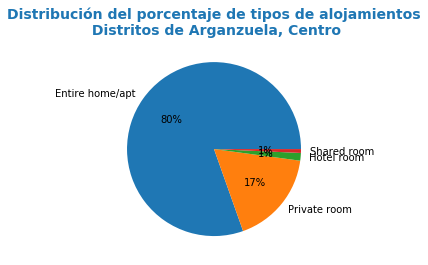

In [55]:
import matplotlib.pyplot as plt

def sectores_tipos_alojamientos(alojamientos, distritos):
    '''
    Función que dibuja un diagrama de sectores con los porcentajes de tipos de alojamientos en unos distritos dados.

    Parámetros:
    - alojamientos: Es una lista de diccionarios, donde cada diccionario contiene los datos de un alojamiento.
    - distritos: Es una lista con los nombres de los distritos. 
    '''
    # Definimos la figura y los ejes del gráfico
    fig, ax = plt.subplots()
    # Filtramos los distritos de la lista de distritos dada, después contamos la frecuencias de los tipos de alojamientos y dibujamos el diagrama de sectores
    alojamientos[alojamientos.distrito.isin(distritos)].tipo_alojamiento.value_counts(normalize = True).plot(kind = 'pie',  autopct='%1.0f%%', ax = ax)
    # Ponermos el título
    ax.set_title('Distribución del porcentaje de tipos de alojamientos\n Distritos de ' + ', '.join(distritos), loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    # Eliminamos la etiqueta del eje y
    ax.set_ylabel('')
    # Guardamos el gráfico.
    plt.show()
    return

#Ejemplo
sectores_tipos_alojamientos(alojamientos, ['Arganzuela', 'Centro'], )


11. Crear una función que dibuje un diagrama de barras con el número de alojamientos por distritos.

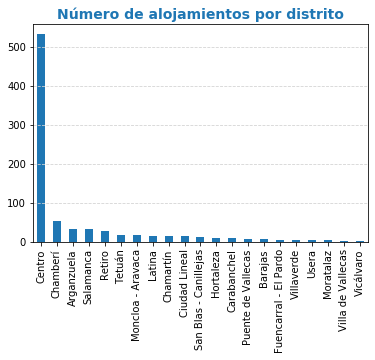

In [56]:
def barras_alojamientos_distritos(alojamientos):
    '''
    Función que dibuja un diagrama de barras con el número de alojamientos por distritos.

    Parámetros:
    - alojamientos: Es una lista de diccionarios, donde cada diccionario contiene los datos de un alojamiento.
    '''
    # Definimos la figura y los ejes del gráfico
    fig, ax = plt.subplots()
    # Contamos la frecuencias de alojamientos por distritos y dibujamos las barras.
    alojamientos.distrito.value_counts().plot(kind = 'bar')
    # Ponemos el título
    ax.set_title('Número de alojamientos por distrito', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    # Ponemos una rejilla
    ax.grid(axis = 'y', color = 'lightgray', linestyle = 'dashed')
    # Guardamos el gráfico.
    plt.show()
    return

# Ejemplo
barras_alojamientos_distritos(alojamientos)

12. Crear una función que dibuje un diagrama de barras con los porcentajes acumulados de tipos de alojamientos por distritos.

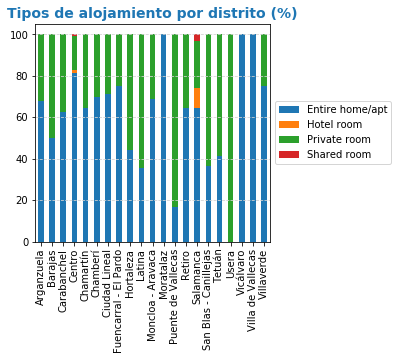

In [57]:
def barras_tipos_alojamientos_distritos(alojamientos):
    '''
    Función que dibuja un diagrama de barras con los porcentajes acumulados de tipos de alojamientos por distritos.

    Parámetros:
    - alojamientos: Es una lista de diccionarios, donde cada diccionario contiene los datos de un alojamiento.
    '''
    # Definimos la figura y los ejes del gráfico
    fig, ax = plt.subplots()
    # Agrupamos el DataFrame por distritos y contamos las frecuencias de los tipos de alojamiento. Después pivotamos el índice de los tipos de alojamientos para pasarlos a columnas y dibujamos las barras acumuladas.
    (alojamientos.groupby('distrito').tipo_alojamiento.value_counts(normalize = True)*100).unstack().plot(kind = 'bar', stacked = True, ax = ax)
    # Ponemos el título
    ax.set_title('Tipos de alojamiento por distrito (%)', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    # Eliminamos la etiqueta del eje x
    ax.set_xlabel('')
    # Ponemos una rejilla
    ax.grid(axis = 'y', color = 'lightgray', linestyle = 'dashed')
    # Reducimos el eje x un 30% para que quepa la leyenda
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.7, box.height])
    # Dibujar la leyenda fuera del área del gráfico
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    # Guardamos el gráfico.
    plt.show()
    return

# Ejemplo
barras_tipos_alojamientos_distritos(alojamientos)

13. Crear una función reciba una lista de distritos y una lista de tipos de alojamientos, y dibuje un diagrama de sectores con la distribución del número de alojamientos de ese tipo por anfitrión en esos distritos.

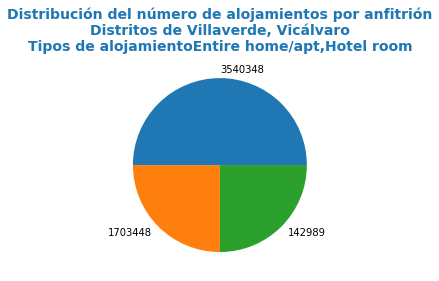

In [58]:
def sectores_tipos_alojamientos_anfitrion(alojamientos, distritos, tipos):
    '''
    Función que dibuja un diagrama de sectores con la distribución del número de alojamientos por anfitrión de unos tipos y en unos distritos dados.

    Parámetros:
    - alojamientos: Es una lista de diccionarios, donde cada diccionario contiene los datos de un alojamiento.
    - distritos: Es una lista con los nombres de los distritos. 
    - tipos: Es una lista con los nombres de los tipos de alojamientos.
    '''
    # Definimos la figura y los ejes del gráfico
    fig, ax = plt.subplots()
    # Filtramos los distritos y los tipos de alojamientos 
    alojamientos_filtrados = alojamientos[alojamientos.distrito.isin(distritos) & alojamientos.tipo_alojamiento.isin(tipos)]
    # Contamos la frecuencia de alojamientos por anfitrión y dibujamos el diagrama de sectores
    alojamientos_filtrados.anfitrion.value_counts(normalize = True).plot(kind = 'pie', ax = ax)
    # Ponermos el título
    ax.set_title('Distribución del número de alojamientos por anfitrión\nDistritos de ' + ', '.join(distritos) + '\nTipos de alojamiento' + ','.join(tipos), loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    # Eliminamos la etiqueta del eje y
    ax.set_ylabel('')
    # Guardamos el gráfico.
    plt.show()
    return

# Ejemplo
sectores_tipos_alojamientos_anfitrion(alojamientos, ['Villaverde', 'Vicálvaro'], ['Entire home/apt', 'Hotel room'])


14. Crear una función que dibuje un diagrama de barras con los precios medios por persona y día de cada distrito.

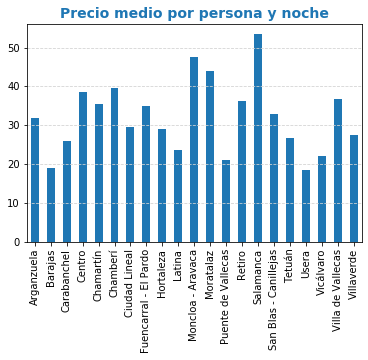

In [59]:
def barras_precios_medios_persona(alojamientos):
    '''
    Función que dibuja un diagrama de barras con los precios medios por persona y día de cada distrito.

    Parámetros:
    - alojamientos: Es una lista de diccionarios, donde cada diccionario contiene los datos de un alojamiento.
    '''
    # Definimos la figura y los ejes del gráfico
    fig, ax = plt.subplots()
    # Agrupamos por distrito, calculamos la media de precio por persona y dibujamos las barras.
    alojamientos.groupby('distrito').precio_persona.mean().plot(kind = 'bar', ax = ax)
    # Ponemos el título
    ax.set_title('Precio medio por persona y noche', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    # Eliminamos la etiqueta del eje x
    ax.set_xlabel('')
    # Ponemos una rejilla
    ax.grid(axis = 'y', color = 'lightgray', linestyle = 'dashed')
    # Guardamos el gráfico.
    plt.show()
    return

# Ejemplo
barras_precios_medios_persona(alojamientos)

15. Crear una función que reciba una lista de distritos y dibuje un gráfico de dispersión con el precio por por noche y persona y la puntuación en esos distritos.

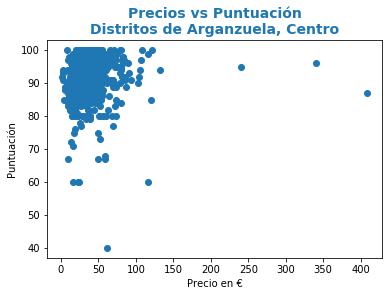

In [60]:
def precios_puntuacion_distritos(alojamientos, distritos):
    '''
    Función que dibuja un diagrama de dispersión con el precio por noche y persona y la puntuación en unos distritos dados.

    Parámetros:
    - alojamientos: Es una lista de diccionarios, donde cada diccionario contiene los datos de un alojamiento.
    - distritos: Es una lista con los nombres de los distritos. 
    '''
    # Definimos la figura y los ejes del gráfico
    fig, ax = plt.subplots()
    # Filtramos los distritos
    alojamientos_filtrados = alojamientos[alojamientos.distrito.isin(distritos)]
    # Creamos una nueva columna con el precio por persona multiplicando el precio diario por el número mínimo de noches, sumando los gastos de limpieza y finalmente dividiendo por el número mínimo de noches y el número de plazas.
    alojamientos['precio_persona'] = (alojamientos.precio * alojamientos.noches_minimas + alojamientos.gastos_limpieza) / (alojamientos.noches_minimas + alojamientos.plazas)
    # Dibujamos el diagrama de sipersión
    ax.scatter(alojamientos['precio_persona'], alojamientos['puntuacion'])
    # Ponemos el título
    ax.set_title('Precios vs Puntuación\nDistritos de ' + ', '.join(distritos), loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    # Ponemos las etiquetas de los ejes
    ax.set_xlabel('Precio en €')
    ax.set_ylabel('Puntuación')
    # Guardamos el gráfico.
    plt.show()
    return

# Ejemplo
precios_puntuacion_distritos(alojamientos, ['Arganzuela', 'Centro'])